# 1330-005 Concrete Strength Project
##### By: MABUYAKU EWORITSE, EZINNE DURU, AND JAKE BEARDSLEY

In [1]:
#Modules used
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Dataset read into a Pandas.DataFrame
data=pd.read_excel('Concrete_Data.xls')
#Columns renamed for simplicity
data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BlastFurnaceSlag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'FlyAsh',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'CoarseAggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FineAggregate',
       'Age (day)':'Age',
       'Concrete compressive strength(MPa, megapascals) ':'CompressiveStrength'},inplace=True)
#Pandas.DataFrame is divided into x values (composition and age of concrete) and y values (compressive strength)
attributes=data[['Cement',
       'BlastFurnaceSlag',
       'FlyAsh',
       'Water',
       'Superplasticizer',
       'CoarseAggregate',
       'FineAggregate',
       'Age']]
compStr=data['CompressiveStrength']
#Credit to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#sklearn.tree.DecisionTreeRegressor.score for implementing this model
dTPredModel=DecisionTreeRegressor()

## Functions Used by the Program

#### Compressive Strength Prediction Functions

In [3]:
#The model is rebuilt and trained from 100% of the data so that it is more accurate. This function will be called whenever the dataFrame is modified
def buildModel():
    dTPredModel.fit(attributes,compStr)
#This function must be called once at the start of the program 
buildModel()

In [4]:
#This function takes in an array of 8 values containing the concrete's composition and age (7 floats representing the kg per m^3 of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate and fine aggregate and an int representing the age in days) and returns a prediction of its compressive strength in megapascals
def predictStrength(input):
    #First, the function tries to find an identical concrete sample already in the DataFrame. The input is converted into a Pandas.Series so that it can be compared with the existing data
    #Credit to https://www.geeksforgeeks.org/creating-a-pandas-series/ for creating a Pandas.Series from an array with indices
    concreteInput=pd.Series(input,index=attributes.columns)
    #The DataFrame (not including the compressive strength since that is not inputted by the user) is traversed by row until it finds a concrete sample that has an identical composition and age as the user input
    for knownSample in attributes.iloc:
        #If none of the attributes are different, this condition is true
        #Credit to https://thispointer.com/pandas-check-if-a-value-exists-in-a-dataframe-using-in-not-in-operator-isin/ for the .any() function used in the boolean expression
        if((concreteInput!=knownSample).any()==False):
            #The compressive strength of the concrete sample in the DataFrame is returned because it is from an actual real-world test
            #Credit to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.name.html for using name attribute of a Pandas.Series as an index
            return compStr[knownSample.name]
    #If the composition and age given by the user are not found in the DataFrame, then its compressive strength is predicted by the Decision Tree regression model
    return dTPredModel.predict([input])[0]

#### Concrete Sample Addition to Database Functions

In [5]:
#This function takes in an array of 9 values containing a known concrete's composition, age, and compressive strength (7 floats representing the kg per m^3 of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate and fine aggregate; an int representing the age in days; and a float representing the compressive strength in megapascals) and adds it to the Pandas.DataFrame and excel file and rebuilds the predction model
#If the user input is already found in the Pandas.DataFrame, then it is not added and this function returns False. Otherwise it returns True
def addConcreteSample(input):
    #data is the global variable for the database
    #Credit to https://www.w3schools.com/python/gloss_python_global_variables.asp for global keyword
    global data
    #Credit to https://www.geeksforgeeks.org/creating-a-pandas-series/ for creating a Pandas.Series from an array with indices
    concreteInput=pd.Series(input, index = data.columns)
    #The function first checks if the sample is already in the database
    for knownSample in data.iloc:
        #If none of the values are different, this condition is true
        #Credit to https://thispointer.com/pandas-check-if-a-value-exists-in-a-dataframe-using-in-not-in-operator-isin/ for the .any() function used in the boolean expression
        if((concreteInput!=knownSample).any()==False):
            #The compressive strength of the concrete sample in the DataFrame is returned because it is from an actual real-world test
            #Credit to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.name.html for using name attribute of a Pandas.Series as an index
            return False
    #A new row is added to the Pandas.DataFrame containing the user input
    data=data.append(concreteInput, ignore_index=True)
    #The excel file is rewritten to match the new data
    data.to_excel('Concrete_Data.xls', index = None, header = True)
    #The prediction model is rebuilt to account for the update
    buildModel()
    return True

In [6]:
#This function provides the original given database
def restoreOriginalData():
    #data is the global variable for the database
    #Credit to https://www.w3schools.com/python/gloss_python_global_variables.asp for global keyword
    global data
    data=pd.read_excel('Concrete_Data_Original.xls')
    data.to_excel('Concrete_Data.xls', index = None, header = True)
    buildModel()

## User Interface for Data Model for Predicting Compressive Strength and Database Updating with Concrete Samples

In [7]:
option = 5
while option != '3':
    option = input("""Welcome to the Concrete Database please select an option
=========================================================================
[1] Enter a new value to existing database.
[2] Predict a new concrete strength.
[3] Exit.

""")
    if option == '1':
        Cement = float(input("Please enter the cement variable (in kg per m^3) "))
        Slag = float(input("Please enter the slag variable (in kg per m^3) "))
        FlyAsh = float(input("Please enter the fly ash variable (in kg per m^3) "))
        Water = float(input("Please enter the water variable (in kg per m^3) "))
        Plasticizer = float(input("Please enter the superplasticizer variable (in kg per m^3) "))
        Coarse = float(input("Please enter the coarse aggregate variable (in kg per m^3) "))
        Fine = float(input("Please enter the fine aggregate variable (in kg per m^3) "))
        Age = float(input("Please enter the number of days the concrete has set "))
        Strength = float(input("Please enter the compressive strength (in megapascals)"))
        Addition = [Cement, Slag, FlyAsh, Water, Plasticizer, Coarse, Fine, Age, Strength]
        if addConcreteSample(Addition):
            print("The concrete sample has been added to the database.")
        else:
            print("The concrete sample is already in the database.")
        print()
    elif option == '2':
        Cement = float(input("Please enter the cement variable (in kg per m^3) "))
        Slag = float(input("Please enter the slag variable (in kg per m^3) "))
        FlyAsh = float(input("Please enter the fly ash variable (in kg per m^3) "))
        Water = float(input("Please enter the water variable (in kg per m^3) "))
        Plasticizer = float(input("Please enter the superplasticizer variable (in kg per m^3) "))
        Coarse = float(input("Please enter the coarse aggregate variable (in kg per m^3) "))
        Fine = float(input("Please enter the fine aggregate variable (in kg per m^3) "))
        Age = float(input("Please enter the number of days the concrete has set "))
        PredictSample = [Cement, Slag, FlyAsh, Water, Plasticizer, Coarse, Fine, Age]
        print("The predicted compressive strength of the concrete is",round(predictStrength(PredictSample),3),"megapascals.")
        print()
    elif option == '3':
        print("Thank you")
        
    elif option != '3':
        print('This is in an valid response, Please try again.')

Welcome to the Concrete Database please select an option
[1] Enter a new value to existing database.
[2] Predict a new concrete strength.
[3] Exit.

3
Thank you


### data.tail()

## Analysis and Implementation of a Data Model to Predict Compressive Strength of a Sample of Concrete

In [8]:
#Analysis of Multiple Linear Regression
#Credit to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html for parameter functions called
#Model is trained on 80% of the data
x_train,x_test,y_train,y_test=train_test_split(attributes,compStr,test_size=0.8,random_state=0)
linPredModel = LinearRegression()
linPredModel.fit(x_train,y_train)

LinearRegression()

In [9]:
#Exact equation of linear regression is shown with an example of what it means
print('Y intercept:',linPredModel.intercept_)
print('Slope of each concrete attribute:')
for i in range(len(data.columns)-1):
    print(data.columns[i],' : ',linPredModel.coef_[i])

print('')
print('If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Linear regression model that its compressive strength would be',linPredModel.predict([[500,0,0,200,10,1000,600,500]])[0],'megapascals.')

Y intercept: -84.33630937482414
Slope of each concrete attribute:
Cement  :  0.12963171672114165
BlastFurnaceSlag  :  0.1126469030194545
FlyAsh  :  0.10559544886056015
Water  :  -0.013886115972156785
Superplasticizer  :  0.5805168936260688
CoarseAggregate  :  0.028794965827392105
FineAggregate  :  0.04467275061608609
Age  :  0.12474715955396236

If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Linear regression model that its compressive strength would be 101.47969070160096 megapascals.


In [10]:
#Measurements of goodness of fit and error to compare with other models
linMAE=metrics.mean_absolute_error(np.array(y_test), linPredModel.predict(x_test))
linMSE=metrics.mean_squared_error(np.array(y_test), linPredModel.predict(x_test))
linR2=metrics.r2_score(np.array(y_test), linPredModel.predict(x_test))

In [11]:
#Analysis of Random Forest Regression
#Credit to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html for implementing this model
#Model is trained on 80% of the data
x_train,x_test,y_train,y_test=train_test_split(attributes,compStr,test_size=0.8,random_state=0)
rFPredModel = RandomForestRegressor()
rFPredModel.fit(attributes,compStr)

RandomForestRegressor()

In [12]:
#Because this model is based around a tree, it doesn't have an easy to understand equation, but an example can be shown
print('If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Random Forest regression model that its compressive strength would be',rFPredModel.predict([[500,0,0,200,10,1000,600,500]])[0],'megapascals.')

If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Random Forest regression model that its compressive strength would be 53.48451392014565 megapascals.


In [13]:
#Measurements of goodness of fit and error to compare with other models
rFMAE=metrics.mean_absolute_error(np.array(y_test), rFPredModel.predict(x_test))
rFMSE=metrics.mean_squared_error(np.array(y_test), rFPredModel.predict(x_test))
rFR2=metrics.r2_score(np.array(y_test), rFPredModel.predict(x_test))

In [14]:
#Analysis of Lasso Regression
#Credit to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html for implementing this model
#Model is trained on 80% of the data
x_train,x_test,y_train,y_test=train_test_split(attributes,compStr,test_size=0.8,random_state=0)
lasPredModel = Lasso()
lasPredModel.fit(x_train,y_train)

Lasso()

In [15]:
#Exact equation of lasso regression is shown with an example of what it means
print('Y intercept:',lasPredModel.intercept_)
print('Slope of each concrete attribute:')
for i in range(len(data.columns)-1):
    print(data.columns[i],' : ',lasPredModel.coef_[i])
    
print('')
print('If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Lasso regression model that its compressive strength would be',lasPredModel.predict([[500,0,0,200,10,1000,600,500]])[0],'megapascals.')

Y intercept: -76.46946646014317
Slope of each concrete attribute:
Cement  :  0.1291649851332286
BlastFurnaceSlag  :  0.11155463858548002
FlyAsh  :  0.1057115963188281
Water  :  -0.02894000328898162
Superplasticizer  :  0.5084004879892099
CoarseAggregate  :  0.02561601539166691
FineAggregate  :  0.04289703606650425
Age  :  0.12426705884230849

If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Lasso regression model that its compressive strength would be 100.89679678129062 megapascals.


In [16]:
#Measurements of goodness of fit and error to compare with other models
lasMAE=metrics.mean_absolute_error(np.array(y_test), lasPredModel.predict(x_test))
lasMSE=metrics.mean_squared_error(np.array(y_test), lasPredModel.predict(x_test))
lasR2=metrics.r2_score(np.array(y_test), lasPredModel.predict(x_test))

In [17]:
#Analysis of Decision Tree Regression
#Credit to https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.score for implementing this model
#Model is trained on 80% of the data
x_train,x_test,y_train,y_test=train_test_split(attributes,compStr,test_size=.8,random_state=0)
dTPredModel = DecisionTreeRegressor()
dTPredModel.fit(x_test,y_test)

DecisionTreeRegressor()

In [18]:
#Because this model is based around a tree, it doesn't have an easy to understand equation, but an example can be shown
print('If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Decision Tree regression model that its compressive strength would be',dTPredModel.predict([[500,0,0,200,10,1000,600,500]])[0],'megapascals.')

If a sample of concrete had 500kg of cement, 200kg of water, 10kg of superplasticizer, 1000kg of coarse aggregate, and 600kg of fine aggregate per cubic meter and was 500 days old, it is predicted from a Decision Tree regression model that its compressive strength would be 55.15808 megapascals.


In [19]:
#Measurements of goodness of fit and error to compare with other models
dTMAE=metrics.mean_absolute_error(np.array(y_test), dTPredModel.predict(x_test))
dTMSE=metrics.mean_squared_error(np.array(y_test), dTPredModel.predict(x_test))
dTR2=metrics.r2_score(np.array(y_test), dTPredModel.predict(x_test))

In [20]:
#The mean absolute error, mean squared error, and the R^2 score for each model are compared
print('Goodness of Fit Metrics for each Regression Model')
print('')
print('Multiple Linear Regression-')
print('    Mean Absolute Error =',linMAE)
print('    Mean Squared Error =',linMSE)
print('    R^2 Score =',linR2)
print('')
print('Random Forest Regression-')
print('    Mean Absolute Error =',rFMAE)
print('    Mean Squared Error =',rFMSE)
print('    R^2 Score =',rFR2)
print('')
print('Multiple Lasso Regression-')
print('    Mean Absolute Error =',lasMAE)
print('    Mean Squared Error =',lasMSE)
print('    R^2 Score =',lasR2)
print('')
print('Decision Tree Regression-')
print('    Mean Absolute Error =',dTMAE)
print('    Mean Squared Error =',dTMSE)
print('    R^2 Score =',dTR2)
#It con be observed that Decision Tree regression is the best model to choose because its error metrics are the lowest and its R^2 score is the highest

Goodness of Fit Metrics for each Regression Model

Multiple Linear Regression-
    Mean Absolute Error = 8.308973603342464
    Mean Squared Error = 111.85522253843877
    R^2 Score = 0.5927081073603078

Random Forest Regression-
    Mean Absolute Error = 1.2100682968050773
    Mean Squared Error = 3.866155341698639
    R^2 Score = 0.9859223942286792

Multiple Lasso Regression-
    Mean Absolute Error = 8.291383986771606
    Mean Squared Error = 111.35752280337908
    R^2 Score = 0.5945203523539564

Decision Tree Regression-
    Mean Absolute Error = 0.07309784387512773
    Mean Squared Error = 1.0051438022631245
    R^2 Score = 0.9963400285448619


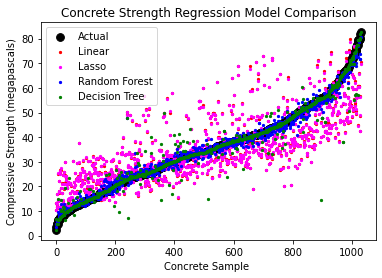

In [31]:
#The Pandas.DataFrame is copied and columns are added to show what each model would predict for known compressive strength experiments
predModels=data.copy()
predModels['Multiple Linear CSMPa Prediction']=linPredModel.predict(attributes)
predModels['Random Forest CSMPa Prediction']=rFPredModel.predict(attributes)
predModels['Multiple Lasso CSMPa Prediction']=lasPredModel.predict(attributes)
predModels['Decision Tree CSMPa Prediction']=dTPredModel.predict(attributes)
#The data is sorted so that when it's graphed, it will be easy to see
#Credit to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html for sorting function
predModels.sort_values(by='CompressiveStrength',ascending=True,inplace=True)
#The regression model predictions are plotted against the actual compressive strength to show how close each model to accurately predicting compressive strength
#Credit to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html for changing size of data points
plt.scatter(range(predModels.shape[0]),predModels['CompressiveStrength'],s=60,color='black',label='Actual')
plt.scatter(range(predModels.shape[0]),predModels['Multiple Linear CSMPa Prediction'],s=5,color='red',label='Linear')
plt.scatter(range(predModels.shape[0]),predModels['Multiple Lasso CSMPa Prediction'],s=5,color='magenta',label='Lasso')
plt.scatter(range(predModels.shape[0]),predModels['Random Forest CSMPa Prediction'],s=5,color='blue',label='Random Forest')
plt.scatter(range(predModels.shape[0]),predModels['Decision Tree CSMPa Prediction'],s=5,color='green',label='Decision Tree')
plt.legend()
plt.title('Concrete Strength Regression Model Comparison')
plt.xlabel('Concrete Sample ')
plt.ylabel('Compressive Strength (megapascals)')
plt.show()
#The graph indicates that although both Decision Tree and Random Forest regression are very accurate, Decision Tree regression is consistently much more accurate. Therefore we will use the Decision Tree regression model

## Model Test on Sample Input

In [23]:
#Make dataframe then add column
modelTest=pd.DataFrame({'Cement':[175.0,320.0,320.0,320.0,530.0],
       'BlastFurnaceSlag':[13.0,0.0,0.0,73.0,359.0],
       'FlyAsh':[172.0,0.0,126.0,54.0,200.0],
       'Water':[156.0,192.0,209.0,181.0,247.0],
       'Superplasticizer':[4.0,0.0,5.7,6.0,32.0],
       'CoarseAggregate':[1000.0,970.0,860.0,972.0,1145.0],
       'FineAggregate':[856.0,850.0,856.0,773.0,992.0],
       'Age':[3,7,28,45,365]})
#Credit to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html for creating an empty Pandas.Series
strengths=pd.Series(index=[0,1,2,3,4],dtype=object)
for sample in modelTest.iloc:
    #Credit to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.name.html for using name attribute of a Pandas.Series as an index
    strengths[sample.name]=predictStrength([sample['Cement'],sample['BlastFurnaceSlag'],sample['FlyAsh'],sample['Water'],sample['Superplasticizer'],sample['CoarseAggregate'],sample['FineAggregate'],sample['Age']])
modelTest['CompressiveStrength']=strengths
#Credit to answer by user "Cainã Max Couto-Silva" on https://stackoverflow.com/questions/64846520/display-pandas-dataframe-without-index
modelTest.style.hide_index()

Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
175.000000,13.000000,172.000000,156.000000,4.000000,1000.000000,856.000000,3,9.445821
320.000000,0.000000,0.000000,192.000000,0.000000,970.000000,850.000000,7,14.989208
320.000000,0.000000,126.000000,209.000000,5.700000,860.000000,856.000000,28,40.062003
320.000000,73.000000,54.000000,181.000000,6.000000,972.000000,773.000000,45,50.773013
530.000000,359.000000,200.000000,247.000000,32.000000,1145.000000,992.000000,365,59.590426


## Literature Research

#### Concrete mixture designs present itself as challenging because it is composed of many different variables that all consist of different elements. Concrete strength is important to the formulation and longevity of the concrete. Having the exact concrete strength will determine if it will be high or normal performance. Not performing this test can put construction companies at risk of great liability issues. Strength and durability of the concrete mix design are dependent upon the following factors: type of cement quality of all variables, ratio between water and cement which comes from the   correlation between rheological parameters and compressive strength durability and workability( Capable of being put into effective operation) 

### Reference

Islam Laskar, Aminul. "Mix design of high-performance concrete" 11 December 2011, https://www.scielo.br/j/mr/a/v4gqnHMs8mhfcDTvqTtzCvF/?lang=en


#### Compressive strength of concrete depends on many factors such as water-cement ratio, cement strength, quality of concrete material, quality control during the production of concrete, etc. Test for compressive strength is carried out either on a cube or cylinder. Various standard codes recommend a concrete cylinder or concrete cube as the standard specimen for the test. American Society for Testing Materials ASTM C39/C39M provides Standard Test Method for Compressive Strength of Cylindrical Concrete Specimens. Compressive strength is the ability of material or structure to carry the loads on its surface without any crack or deflection. A material under compression tends to reduce the size, while in tension, size elongates.

### Reference
Gopal Mishra. “Compressive Strength of Concretee - Cube Test [Pdf], Procedure, Results”  THE CONSTRUCTOR Building ideas,Jan 2th 2020, https://theconstructor.org/concrete/compressive-strength-concrete-cube-test/1561/.

## Database Description

#### The database is in the form of an excel file. Each row is a sample of concrete that has been tested on its compressive strength. Each column represents a different attribute. The first 7 are the densities of different materials present in the concrete, including water, cement, etc. The units are in kg per m^3. The 8th column is how many days old the concrete is and the 9th column is its compressive strength in megapascals. Based on the above scatter plot, compressive strength has a normal distribution and is slightly positively skewed. There are a total of 1030 samples of concrete in the database and no data values are missing.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [25]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [28]:
data.sum()

Cement                 2.896006e+05
BlastFurnaceSlag       7.611235e+04
FlyAsh                 5.581275e+04
Water                  1.870134e+05
Superplasticizer       6.389205e+03
CoarseAggregate        1.002106e+06
FineAggregate          7.967862e+05
Age                    4.703200e+04
CompressiveStrength    3.689237e+04
dtype: float64

## How-To Video

https://vimeo.com/705171642/8fe4817da0

## Project Management Video


https://vimeo.com/705174460/a0b148303e